<a href="https://colab.research.google.com/github/Avit-hodibu/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN**

you are the average of the five people you spend the most time with

- it is supervise
- Imagine we have data to predict. So, what we do is find the nearest neighbors of that data using euclidean distance.  Sort it in ascending oder we pick first n data. We see ehat is the majority of that n data is that will be the prediction.
- use scaling because it done through distance calculation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(["id","Unnamed: 32"],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("diagnosis", axis=1), df["diagnosis"], test_size=0.3
)

In [5]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.15000,0.2045,0.2829,0.15200,0.2650,0.06387
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,0.06390,...,16.33,30.86,109.50,826.4,0.14310,0.3026,0.3194,0.15650,0.2718,0.09353
354,11.14,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,0.06083,...,12.12,15.82,79.62,453.5,0.08864,0.1256,0.1201,0.03922,0.2576,0.07018
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.12560,0.1804,0.1230,0.06335,0.3100,0.08203
340,14.42,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,0.1912,0.06412,...,16.67,21.51,111.40,862.1,0.12940,0.3371,0.3755,0.14140,0.3053,0.08764


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [8]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9590643274853801

**How to select K?**

-> Two method:

1. heustric approch : K or n_neighbors= square_root(n) , where n is number of observation or data . Avoid the K value even. For example it is K or n_neighbors= square_root(n) = 4 then make it 3 or 5. not even number, always odd.

2. experimentation : It is better technique. Use cross-validation. This split train data to train and test agai and will make KNN value 1, 2, 3, 4...... so on and find the accuracy_score . The best accuracy_score in test data is selected.

In [9]:
#EXPERIMENT
scores = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))

scores


[0.9415204678362573,
 0.9590643274853801,
 0.9649122807017544,
 0.9532163742690059,
 0.9590643274853801,
 0.9473684210526315,
 0.9532163742690059,
 0.9473684210526315,
 0.9532163742690059]

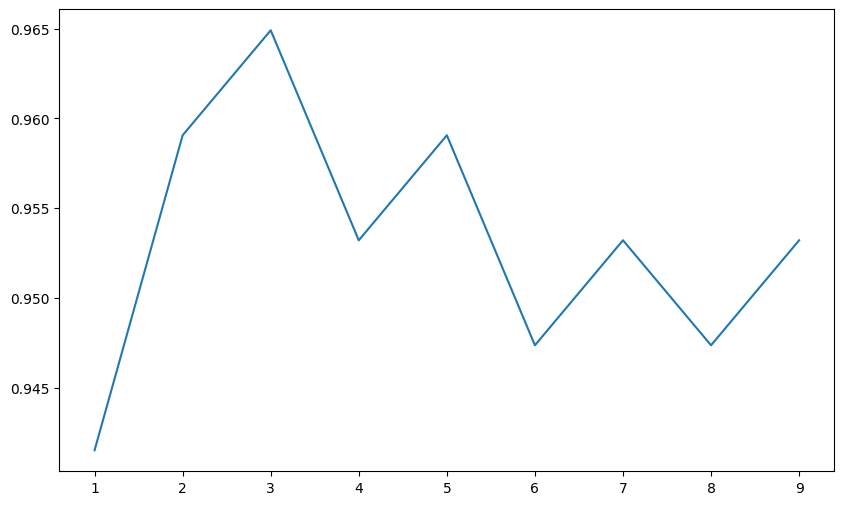

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), scores)

k = 3 is best accuracy score

**Decision Surface**= tool to understand the performance of classification.

Surface where surface is divided into different region of class. So, if any data fall in that region it will clearly known what is the answer or predication. Boundary where the decision changes is decision boundary.

plot your training data. we calculate the range of data. we generate mascaras numpy . We sent data to KNN train. We fill answer by color and if there is more one color then it will be its region.

Overfitting: when k value is very small then there is chance of overfitting

Underfitting: when n and k is equal then all the point be it's neighbourhood. SO, the data which is more dominating will be the answer. That means if we chose any point it will be same answer. This is underfitting


WE can find intermidate through experiment.

**Limitation**

1. when have large dataset: KNN is lazy learning technique. this means it doesnot do much in training(do nothing just store the data) but do all work in testing(processing). This means training is fast but prediction is slow.

2. High dimension data: if we have high dim then curse of dimension kick in. In high dimension, distance is not well calculate. KNN is based on calculating distance.

3. Outliers: It is sensitive to outliers.

4. Non-homogeneous scales: one will dominate other if one has higher values. It means it doesnot have good distance calculation. SO use scaling

5. Imbalanced dataset: More will dominate few data. SO, it will become biased.

6. Inference and not for prediction: It canot calcuate the impact of X features. It is do only through distance